## 用 LSTM 預測股票

### 安裝 pandas-datareader

In [1]:
! pip install pandas-datareader

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 讀取股票資料

In [6]:
import pandas_datareader
dataset_train = pandas_datareader.get_data_yahoo('2891.TW')

Populating the interactive namespace from numpy and matplotlib


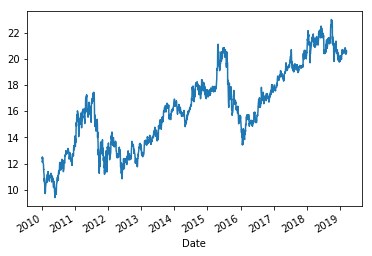

In [9]:
%pylab inline
dataset_train['Close'].plot(kind = 'line')

In [10]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2258 entries, 2010-01-04 to 2019-03-15
Data columns (total 6 columns):
High         2258 non-null float64
Low          2258 non-null float64
Open         2258 non-null float64
Close        2258 non-null float64
Volume       2258 non-null float64
Adj Close    2258 non-null float64
dtypes: float64(6)
memory usage: 123.5 KB


In [11]:
dataset_train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2258.000000,2258.000000,2258.000000,2258.000000,2.258000e+03,2258.000000
mean,16.337582,16.083328,16.219394,16.212431,4.479740e+07,13.753408
std,3.134006,3.133552,3.133594,3.141839,2.782286e+07,3.968961
min,9.570480,9.205890,9.448950,9.418570,0.000000e+00,6.508332
25%,13.614450,13.402200,13.514900,13.487150,2.657971e+07,10.343856
50%,16.260500,16.024200,16.148100,16.148100,3.787212e+07,13.325441
75%,18.750000,18.587500,18.700001,18.667026,5.371670e+07,16.667042
max,23.000000,22.799999,22.900000,23.000000,3.655387e+08,23.000000


In [12]:
training_set = dataset_train.iloc[:, 3:4].values

In [13]:
training_set

array([[12.15299988],
       [12.15299988],
       [12.51760006],
       ...,
       [20.45000076],
       [20.54999924],
       [20.60000038]])

###  資料標準化

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.20133596],
       [0.20133596],
       [0.22818145],
       ...,
       [0.81224369],
       [0.81960657],
       [0.82328816]])

In [16]:
len(training_set_scaled)

2258

In [20]:
2258 * 0.8

1806.4

In [21]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1740, 60)

In [24]:
y_train.shape

(1740,)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1740, 60, 1)

###  建構神經網路模型 

In [26]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
1740/1740 [==============================] - 11s 6ms/step - loss: 0.0340
Epoch 2/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0060
Epoch 3/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0042
Epoch 4/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0044
Epoch 5/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0038
Epoch 6/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0037
Epoch 7/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0036
Epoch 8/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0033
Epoch 9/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0033
Epoch 10/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0031
Epoch 11/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0035


1740/1740 [==============================] - 9s 5ms/step - loss: 7.1892e-04
Epoch 93/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.8142e-04
Epoch 94/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.4777e-04
Epoch 95/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.7793e-04
Epoch 96/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.2604e-04
Epoch 97/100
1740/1740 [==============================] - 9s 5ms/step - loss: 6.8011e-04
Epoch 98/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.3575e-04
Epoch 99/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.4229e-04
Epoch 100/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.6347e-04


In [82]:
#X_train[1739,:,:]

In [39]:
training_set_scaled[1800, :]

array([0.69811719])

In [40]:
len(training_set)

2258

In [42]:
len(X_train)

1740

In [51]:
2258 - 1740 - 60

458

In [49]:
inputs = training_set_scaled[len(training_set) - len(X_train) - 60:]

In [50]:
inputs.shape

(1800, 1)

In [60]:
import numpy as np
X_test = []
y_test = []
for i in range(1800, 2258):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i,0])
X_test, y_test= np.array(X_test), np.array(y_test)

In [61]:
X_test.shape

(458, 60)

In [62]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(458, 60, 1)

In [63]:
predicted = regressor.predict(X_test)

In [64]:
X_test.shape

(458, 60, 1)

In [66]:
len(predicted)

458

In [67]:
len(y_test)

458

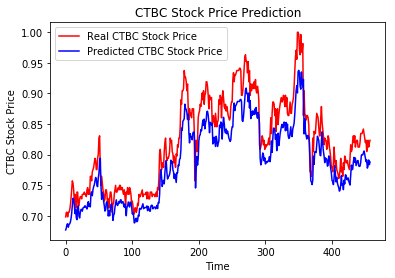

In [77]:
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(predicted, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

In [72]:
y_test = y_test.reshape(-1,1)

In [73]:
real_stock_price = sc.inverse_transform(y_test)

In [75]:
predicted_stock_price = sc.inverse_transform(predicted)

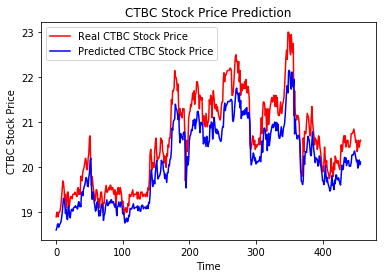

In [78]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

In [79]:
real_stock_price[-1]

array([20.60000038])

In [80]:
predicted_stock_price[-1]

array([20.11528], dtype=float32)

In [81]:
(20.11528 - 20.60000038 )/ 20.60000038

-0.02353011509993003

In [84]:
training_predicted = regressor.predict(X_train)

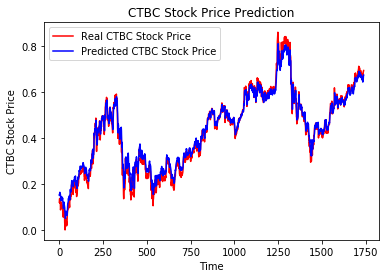

In [85]:
import matplotlib.pyplot as plt
plt.plot(y_train, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(training_predicted, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

## 多變數預測

### 讀取資料

In [86]:
from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### 資料預處理

In [87]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)


In [89]:
dataset = dataset[24:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


### 資料探索

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


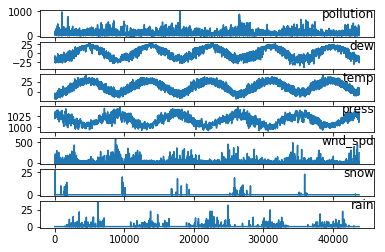

In [90]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### 資料轉換

In [91]:
import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### 資料編碼

In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

In [94]:
values[0:3]

array([[ 129.  ,  -16.  ,   -4.  , 1020.  ,    2.  ,    1.79,    0.  ,
           0.  ],
       [ 148.  ,  -15.  ,   -4.  , 1020.  ,    2.  ,    2.68,    0.  ,
           0.  ],
       [ 159.  ,  -11.  ,   -5.  , 1021.  ,    2.  ,    3.57,    0.  ,
           0.  ]], dtype=float32)

### 正規化特徵

In [95]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [96]:
reframed.head(3)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.0,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.0,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.0,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0


### 捨棄欄位

In [97]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


### 分為訓練與測試資料集

In [98]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 8), (8760,), (35039, 1, 8), (35039,))

### 建立模型

In [99]:
import keras
from keras import layers


model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

### 訓練模型

In [100]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0583 - val_loss: 0.0577
Epoch 2/50
 - 1s - loss: 0.0392 - val_loss: 0.0588
Epoch 3/50
 - 1s - loss: 0.0231 - val_loss: 0.0432
Epoch 4/50
 - 1s - loss: 0.0170 - val_loss: 0.0342
Epoch 5/50
 - 1s - loss: 0.0153 - val_loss: 0.0202
Epoch 6/50
 - 1s - loss: 0.0148 - val_loss: 0.0157
Epoch 7/50
 - 1s - loss: 0.0148 - val_loss: 0.0147
Epoch 8/50
 - 1s - loss: 0.0147 - val_loss: 0.0149
Epoch 9/50
 - 1s - loss: 0.0148 - val_loss: 0.0142
Epoch 10/50
 - 1s - loss: 0.0146 - val_loss: 0.0142
Epoch 11/50
 - 1s - loss: 0.0147 - val_loss: 0.0143
Epoch 12/50
 - 1s - loss: 0.0147 - val_loss: 0.0137
Epoch 13/50
 - 1s - loss: 0.0146 - val_loss: 0.0137
Epoch 14/50
 - 1s - loss: 0.0147 - val_loss: 0.0135
Epoch 15/50
 - 1s - loss: 0.0145 - val_loss: 0.0135
Epoch 16/50
 - 1s - loss: 0.0146 - val_loss: 0.0134
Epoch 17/50
 - 1s - loss: 0.0145 - val_loss: 0.0135
Epoch 18/50
 - 1s - loss: 0.0145 - val_loss: 0.0134
Epoch 19/50
 - 1s - loss

### 繪製損失圖

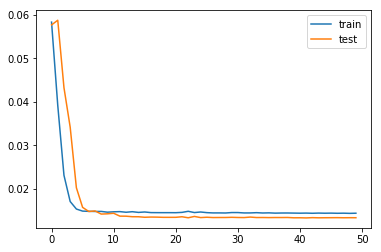

In [101]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### 產生預測

In [102]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


### 反正規化資料

In [103]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [111]:
inv_yhat

array([34.782887 , 31.13924  , 20.50057  , ...,  8.275563 ,  8.244777 ,
        6.4732194], dtype=float32)

In [112]:
inv_y

array([31., 20., 19., ..., 10.,  8., 12.], dtype=float32)

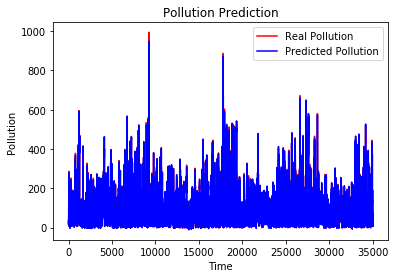

In [113]:
import matplotlib.pyplot as plt
plt.plot(inv_y, color = 'red', label = 'Real Pollution')
plt.plot(inv_yhat, color = 'blue', label = 'Predicted Pollution')
plt.title('Pollution Prediction')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

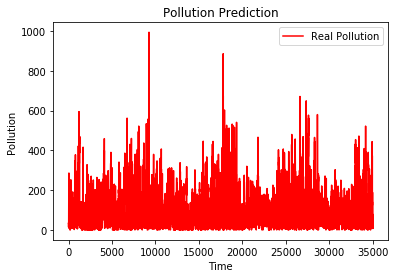

In [114]:
import matplotlib.pyplot as plt
plt.plot(inv_y, color = 'red', label = 'Real Pollution')
#plt.plot(inv_yhat, color = 'blue', label = 'Predicted Pollution')
plt.title('Pollution Prediction')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

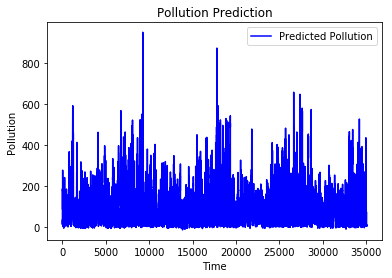

In [115]:
import matplotlib.pyplot as plt
#plt.plot(inv_y, color = 'red', label = 'Real Pollution')
plt.plot(inv_yhat, color = 'blue', label = 'Predicted Pollution')
plt.title('Pollution Prediction')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

## 使用RNN 生成文字

In [116]:
! pip install h5py

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
import keras
from keras import layers
import sys
import numpy as np

text= 'this text file can be any text, as long as it contains text longer than maxlen defined below'

chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1

model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("/Users/davidchiu/course/ctbcpy/data/pre-trained.hdf5")

optimizer = keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [118]:

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def random_reviews():
    # sample a start index
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    # the initial sampled text with maxlen long
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with several reviews for you...')

    for temperature in [0.8]:
        sys.stdout.write(generated_text)

        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            # Turn each char to char index.
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            # Predict next char probabilities
            preds = model.predict(sampled, verbose=0)[0]
            # Add some randomness by sampling given probabilities.
            next_index = sample(preds, temperature)
            # Turn char index to char.
            next_char = chars[next_index]
            # Append char to generated text string
            generated_text += next_char
            # Pop the first char in generated text string.
            generated_text = generated_text[1:]
            # Print the new generated char.
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)

In [120]:
random_reviews()

Coming up with several reviews for you...
text file can be any text, as long as it contains text longer gave us quick s

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ervice. . The lemonade is good. The jerk chicken is the only way to go. Very friendly staff.<EOR>"
"<SOR>The veggie soup did not disappoint.  Don't pass this place on the clubs after the first day of travel to north Rainbow and were taken care of and we were able to find my Dim lightly memorable morning breakfast on here I HAVE try anything with the sweet & savory. Much better than First Watch.<EOR>"
"<SOR>The food is amazing, depending on you to choose from and it's legit! The pan roast is a must try as well. Love this place.<EOR>"
"<SOR>So where we have only Los Angelo's secis place.<EOR>"
"<SOR>So where we have only Los Angelo's sec


## 使用GAN 生成 MNIST

In [122]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

def build_generator():

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

def train(epochs, batch_size=128, sample_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate a batch of new images
        gen_imgs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator (to have the discriminator label samples as valid)
        g_loss = combined.train_on_batch(noise, valid)

        # Plot the progress
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch)

def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/%d.png" % epoch)
    plt.close()

In [123]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params:

In [127]:
train(1000)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.573272, acc.: 75.78%] [G loss: 0.975727]
1 [D loss: 0.583120, acc.: 69.92%] [G loss: 0.973092]
2 [D loss: 0.579759, acc.: 70.31%] [G loss: 1.005350]
3 [D loss: 0.559609, acc.: 77.73%] [G loss: 1.029801]
4 [D loss: 0.586091, acc.: 74.61%] [G loss: 0.990369]
5 [D loss: 0.571825, acc.: 73.05%] [G loss: 1.008646]
6 [D loss: 0.593192, acc.: 75.00%] [G loss: 0.932061]
7 [D loss: 0.580597, acc.: 70.31%] [G loss: 0.993043]
8 [D loss: 0.573215, acc.: 74.61%] [G loss: 0.979603]
9 [D loss: 0.585935, acc.: 76.56%] [G loss: 0.973214]
10 [D loss: 0.599597, acc.: 69.53%] [G loss: 0.952654]
11 [D loss: 0.623263, acc.: 65.23%] [G loss: 0.956118]
12 [D loss: 0.592253, acc.: 71.48%] [G loss: 0.978124]
13 [D loss: 0.580379, acc.: 75.00%] [G loss: 0.953464]
14 [D loss: 0.607592, acc.: 67.97%] [G loss: 0.952938]
15 [D loss: 0.582579, acc.: 73.83%] [G loss: 0.975284]
16 [D loss: 0.604059, acc.: 69.53%] [G loss: 1.000628]
17 [D loss: 0.582190, acc.: 73.44%] [G loss: 1.012581]
18 [D loss: 0.571164

150 [D loss: 0.574934, acc.: 75.39%] [G loss: 1.064226]
151 [D loss: 0.555014, acc.: 80.08%] [G loss: 1.044258]
152 [D loss: 0.542312, acc.: 78.52%] [G loss: 1.045348]
153 [D loss: 0.508553, acc.: 83.59%] [G loss: 1.081970]
154 [D loss: 0.540151, acc.: 80.86%] [G loss: 1.016497]
155 [D loss: 0.537474, acc.: 77.73%] [G loss: 1.020882]
156 [D loss: 0.523564, acc.: 82.42%] [G loss: 1.029111]
157 [D loss: 0.515859, acc.: 82.81%] [G loss: 1.041731]
158 [D loss: 0.530666, acc.: 81.64%] [G loss: 1.059418]
159 [D loss: 0.542396, acc.: 78.91%] [G loss: 1.049453]
160 [D loss: 0.548106, acc.: 78.52%] [G loss: 0.998767]
161 [D loss: 0.543386, acc.: 79.30%] [G loss: 1.026679]
162 [D loss: 0.551929, acc.: 79.30%] [G loss: 1.013446]
163 [D loss: 0.573896, acc.: 75.00%] [G loss: 0.992517]
164 [D loss: 0.538503, acc.: 78.12%] [G loss: 0.994235]
165 [D loss: 0.552497, acc.: 78.52%] [G loss: 1.022316]
166 [D loss: 0.548319, acc.: 73.44%] [G loss: 1.026982]
167 [D loss: 0.561330, acc.: 71.88%] [G loss: 1.

300 [D loss: 0.566976, acc.: 77.73%] [G loss: 1.073599]
301 [D loss: 0.539876, acc.: 79.69%] [G loss: 1.027984]
302 [D loss: 0.587148, acc.: 70.31%] [G loss: 1.037306]
303 [D loss: 0.544054, acc.: 76.17%] [G loss: 1.077967]
304 [D loss: 0.587028, acc.: 71.09%] [G loss: 1.062039]
305 [D loss: 0.554292, acc.: 76.17%] [G loss: 1.036195]
306 [D loss: 0.540251, acc.: 76.95%] [G loss: 1.036571]
307 [D loss: 0.547103, acc.: 75.00%] [G loss: 1.046865]
308 [D loss: 0.553068, acc.: 79.69%] [G loss: 1.065561]
309 [D loss: 0.566598, acc.: 75.00%] [G loss: 1.070837]
310 [D loss: 0.552960, acc.: 71.48%] [G loss: 1.126652]
311 [D loss: 0.571987, acc.: 75.00%] [G loss: 1.082611]
312 [D loss: 0.574167, acc.: 73.83%] [G loss: 1.028793]
313 [D loss: 0.579412, acc.: 75.39%] [G loss: 0.995862]
314 [D loss: 0.528177, acc.: 76.95%] [G loss: 1.036438]
315 [D loss: 0.563160, acc.: 75.00%] [G loss: 1.094699]
316 [D loss: 0.550456, acc.: 76.17%] [G loss: 1.033793]
317 [D loss: 0.578889, acc.: 74.61%] [G loss: 1.

447 [D loss: 0.571199, acc.: 78.91%] [G loss: 1.023794]
448 [D loss: 0.513891, acc.: 79.69%] [G loss: 1.095283]
449 [D loss: 0.522660, acc.: 82.42%] [G loss: 1.112621]
450 [D loss: 0.499592, acc.: 83.20%] [G loss: 1.099068]
451 [D loss: 0.505325, acc.: 82.03%] [G loss: 1.131133]
452 [D loss: 0.508463, acc.: 82.42%] [G loss: 1.091948]
453 [D loss: 0.540415, acc.: 73.83%] [G loss: 1.151470]
454 [D loss: 0.535158, acc.: 78.52%] [G loss: 1.136460]
455 [D loss: 0.501997, acc.: 83.59%] [G loss: 1.132644]
456 [D loss: 0.519579, acc.: 78.91%] [G loss: 1.102873]
457 [D loss: 0.482238, acc.: 83.98%] [G loss: 1.102846]
458 [D loss: 0.515279, acc.: 79.30%] [G loss: 1.074336]
459 [D loss: 0.541317, acc.: 76.56%] [G loss: 1.057071]
460 [D loss: 0.525824, acc.: 78.12%] [G loss: 1.083643]
461 [D loss: 0.568492, acc.: 75.78%] [G loss: 1.023810]
462 [D loss: 0.540150, acc.: 76.56%] [G loss: 1.055553]
463 [D loss: 0.541335, acc.: 77.73%] [G loss: 1.014444]
464 [D loss: 0.504112, acc.: 82.03%] [G loss: 1.

597 [D loss: 0.567577, acc.: 73.44%] [G loss: 1.030586]
598 [D loss: 0.585362, acc.: 75.00%] [G loss: 1.047821]
599 [D loss: 0.573373, acc.: 72.66%] [G loss: 1.022441]
600 [D loss: 0.545263, acc.: 79.30%] [G loss: 1.017958]
601 [D loss: 0.556691, acc.: 75.78%] [G loss: 1.017844]
602 [D loss: 0.568063, acc.: 73.05%] [G loss: 1.044062]
603 [D loss: 0.559165, acc.: 76.95%] [G loss: 1.049959]
604 [D loss: 0.567090, acc.: 74.61%] [G loss: 0.990201]
605 [D loss: 0.589651, acc.: 71.88%] [G loss: 1.018836]
606 [D loss: 0.554016, acc.: 74.22%] [G loss: 1.010301]
607 [D loss: 0.558798, acc.: 74.61%] [G loss: 0.978872]
608 [D loss: 0.579375, acc.: 72.27%] [G loss: 0.974312]
609 [D loss: 0.567242, acc.: 75.00%] [G loss: 1.037116]
610 [D loss: 0.558353, acc.: 76.56%] [G loss: 0.952553]
611 [D loss: 0.606983, acc.: 69.14%] [G loss: 0.967972]
612 [D loss: 0.597340, acc.: 69.53%] [G loss: 0.975424]
613 [D loss: 0.592288, acc.: 72.27%] [G loss: 0.941779]
614 [D loss: 0.575842, acc.: 74.22%] [G loss: 0.

747 [D loss: 0.542752, acc.: 75.39%] [G loss: 1.032209]
748 [D loss: 0.601711, acc.: 66.41%] [G loss: 0.997368]
749 [D loss: 0.557966, acc.: 73.44%] [G loss: 1.033377]
750 [D loss: 0.566832, acc.: 76.56%] [G loss: 1.054038]
751 [D loss: 0.581990, acc.: 73.83%] [G loss: 1.047861]
752 [D loss: 0.594022, acc.: 69.92%] [G loss: 1.041670]
753 [D loss: 0.596138, acc.: 71.88%] [G loss: 1.040939]
754 [D loss: 0.605437, acc.: 64.45%] [G loss: 1.032070]
755 [D loss: 0.610067, acc.: 70.31%] [G loss: 1.020423]
756 [D loss: 0.606562, acc.: 69.14%] [G loss: 0.983045]
757 [D loss: 0.589948, acc.: 71.48%] [G loss: 1.030773]
758 [D loss: 0.579897, acc.: 69.53%] [G loss: 1.022043]
759 [D loss: 0.576061, acc.: 72.27%] [G loss: 1.029256]
760 [D loss: 0.612342, acc.: 71.09%] [G loss: 1.005600]
761 [D loss: 0.610555, acc.: 65.23%] [G loss: 1.046105]
762 [D loss: 0.572274, acc.: 74.61%] [G loss: 1.015690]
763 [D loss: 0.615598, acc.: 66.80%] [G loss: 1.010355]
764 [D loss: 0.609833, acc.: 69.14%] [G loss: 1.

895 [D loss: 0.584285, acc.: 70.70%] [G loss: 1.008597]
896 [D loss: 0.559067, acc.: 75.78%] [G loss: 0.986941]
897 [D loss: 0.561204, acc.: 74.61%] [G loss: 0.980138]
898 [D loss: 0.540766, acc.: 77.34%] [G loss: 0.994412]
899 [D loss: 0.599964, acc.: 68.75%] [G loss: 1.028095]
900 [D loss: 0.553442, acc.: 75.78%] [G loss: 0.976739]
901 [D loss: 0.565866, acc.: 75.00%] [G loss: 0.971992]
902 [D loss: 0.551025, acc.: 76.95%] [G loss: 1.041694]
903 [D loss: 0.560129, acc.: 75.78%] [G loss: 1.048093]
904 [D loss: 0.532973, acc.: 80.47%] [G loss: 0.986700]
905 [D loss: 0.566631, acc.: 71.88%] [G loss: 0.974596]
906 [D loss: 0.578523, acc.: 70.70%] [G loss: 1.001132]
907 [D loss: 0.554561, acc.: 76.95%] [G loss: 1.003865]
908 [D loss: 0.550512, acc.: 75.78%] [G loss: 0.978676]
909 [D loss: 0.544088, acc.: 75.39%] [G loss: 1.029786]
910 [D loss: 0.569918, acc.: 73.05%] [G loss: 0.998978]
911 [D loss: 0.600442, acc.: 71.09%] [G loss: 1.033280]
912 [D loss: 0.577044, acc.: 73.83%] [G loss: 1.